## Amazon SageMaker high-level Python library

Copyright 2018 Amazon.com, Inc. or its affiliates. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License"). You may not use this file except
in compliance with the License. A copy of the License is located at

https://aws.amazon.com/apache-2-0/

or in the "license" file accompanying this file. This file is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the
specific language governing permissions and limitations under the License.

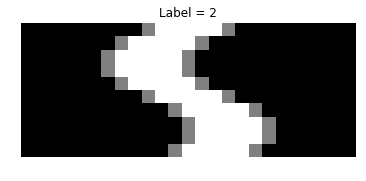

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('training.csv', header=None)
matrix = df.as_matrix()

%matplotlib inline
import matplotlib.pyplot as plt

def show_road(img, caption='', subplot=None):
    if subplot==None:
        _,(subplot)=plt.subplots(1,1)
    imgr=img.reshape((10,25))
    subplot.axis('off')
    subplot.imshow(imgr, cmap='gray')
    plt.title(caption)

row = 15
show_road(matrix[row][1:], "Label = {}".format(matrix[row][0]))

In [2]:
import sagemaker
from sagemaker import get_execution_role

role = get_execution_role()

In [3]:
multiclass_estimator = sagemaker.LinearLearner(role=role,
                                               train_instance_count=1,
                                               train_instance_type='ml.m4.xlarge',
                                               predictor_type='multiclass_classifier',
                                               num_classes=3)

INFO:sagemaker:Created S3 bucket: sagemaker-us-west-2-443769490744


In [4]:
mini_batch_size = 100
records = matrix[:,:-1].astype('float32') # remaining cols, road
labels = matrix[:,0].astype('float32') # 1st col, user input(left/right arrow) - target
train_records = multiclass_estimator.record_set(records, labels, channel='train')
multiclass_estimator.fit([train_records]) # train model


INFO:sagemaker:Creating training-job with name: linear-learner-2019-01-15-12-04-58-279


2019-01-15 12:04:58 Starting - Starting the training job...
2019-01-15 12:04:59 Starting - Launching requested ML instances......
2019-01-15 12:06:04 Starting - Preparing the instances for training...
2019-01-15 12:07:03 Downloading - Downloading input data...
2019-01-15 12:07:09 Training - Downloading the training image...
2019-01-15 12:08:02 Uploading - Uploading generated training model.
Docker entrypoint called with argument(s): train
[01/15/2019 12:07:59 INFO 140118408701760] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u'init_method': u'uniform', u'init_sigma': u'0.01

In [5]:
multiclass_predictor = multiclass_estimator.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

INFO:sagemaker:Creating model with name: linear-learner-2019-01-15-12-10-13-872
INFO:sagemaker:Creating endpoint with name linear-learner-2019-01-15-12-04-58-279


-------------------------------------------------------------------------!

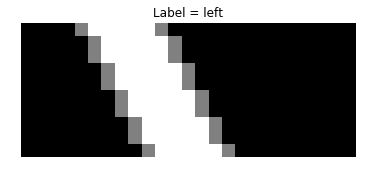

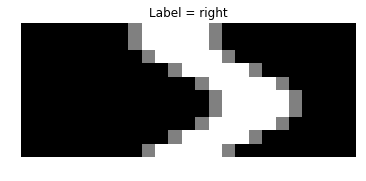

In [6]:
labels = ["left", "straight", "right"]

experiment = np.array([[0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0]]).astype('float32')
result = multiclass_predictor.predict(experiment)
predicted_label = int(result[0].label['predicted_label'].float32_tensor.values[0])
show_road(experiment, "Label = {}".format(labels[predicted_label]))

experiment = np.array([[0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0]]).astype('float32')
result = multiclass_predictor.predict(experiment)
predicted_label = int(result[0].label['predicted_label'].float32_tensor.values[0])
show_road(experiment, "Label = {}".format(labels[predicted_label]))



In [7]:
# delete endpoint
multiclass_predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint with name: linear-learner-2019-01-15-12-04-58-279
